In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/Data Sets/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Check and Handle the Outliers

In [7]:
numeric_feature=df.select_dtypes(include=["float64","int64"]).columns
print("Total number of integer feature : ", numeric_feature.shape[0])
print("Integer feature names: ", numeric_feature)

Total number of integer feature :  9
Integer feature names:  Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


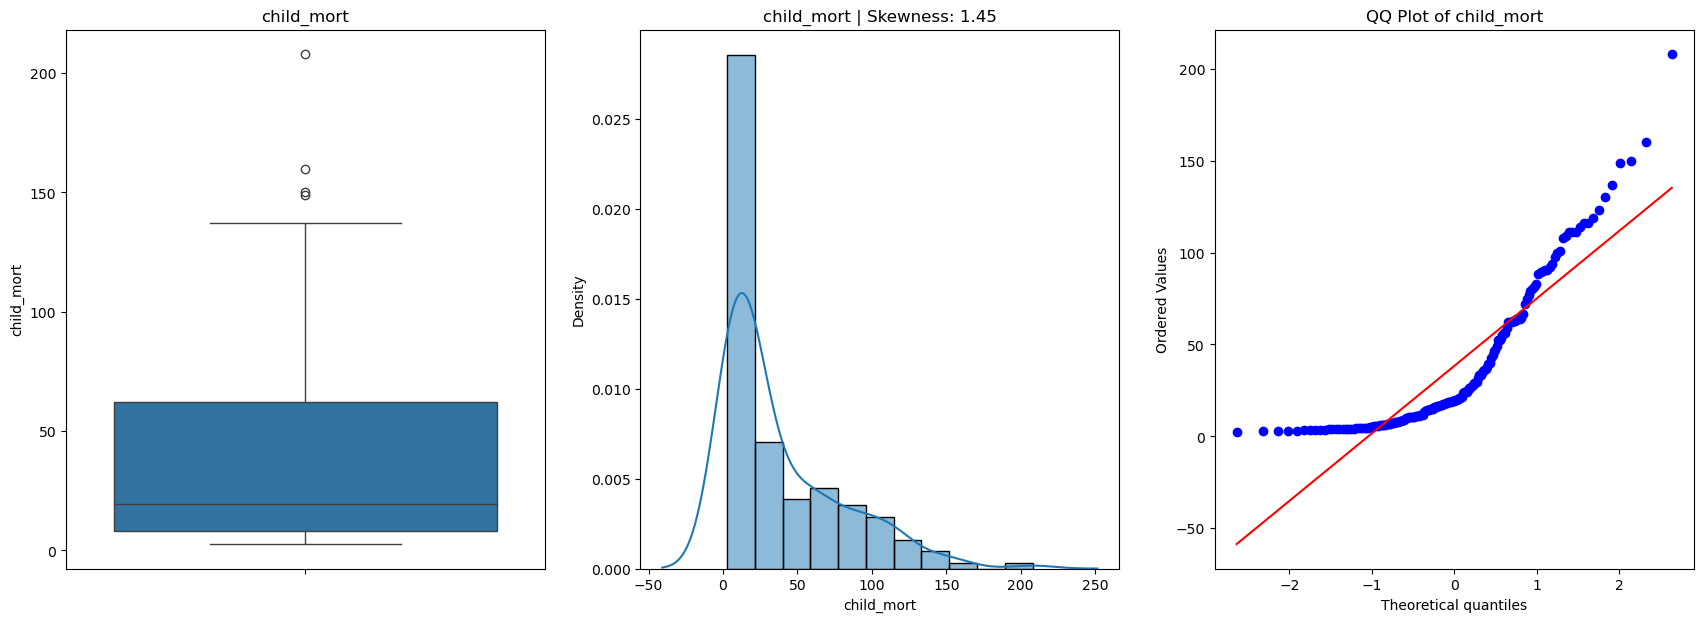

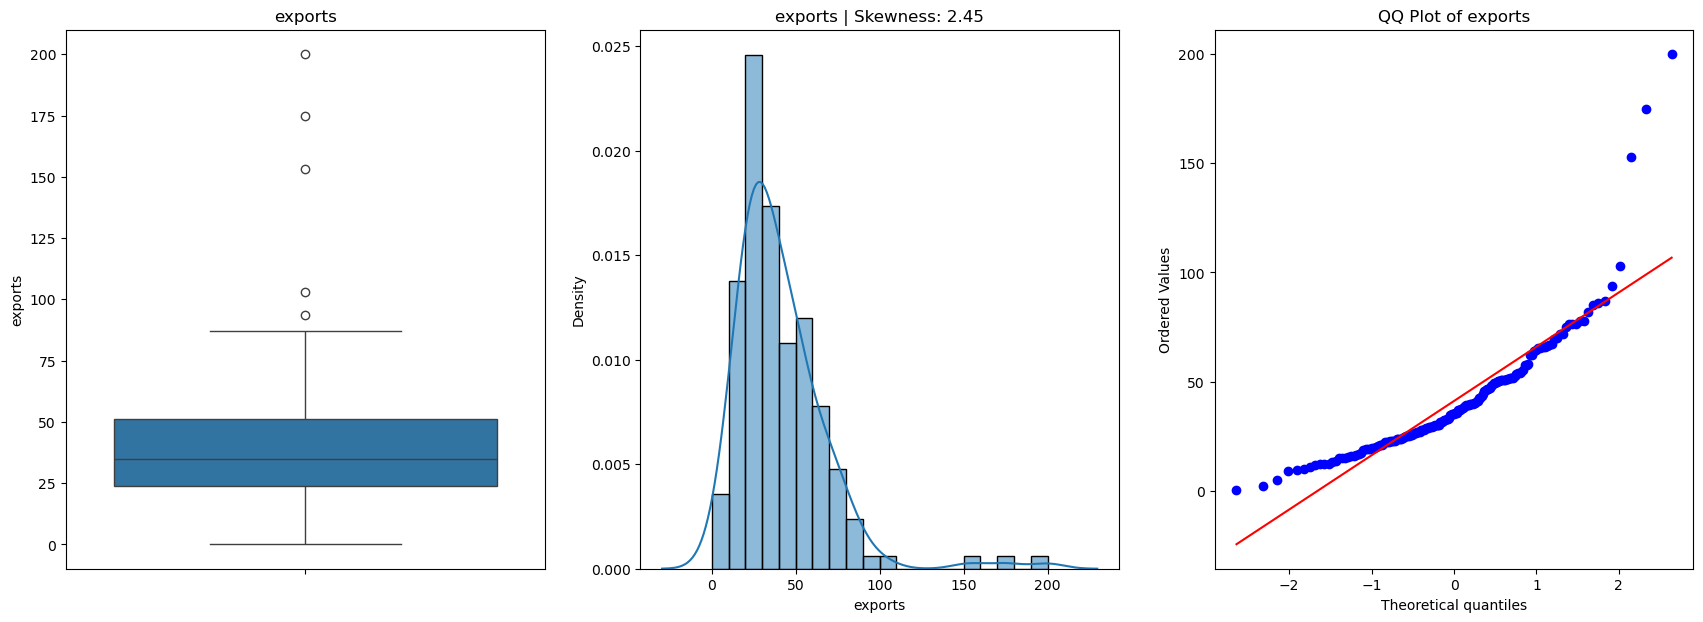

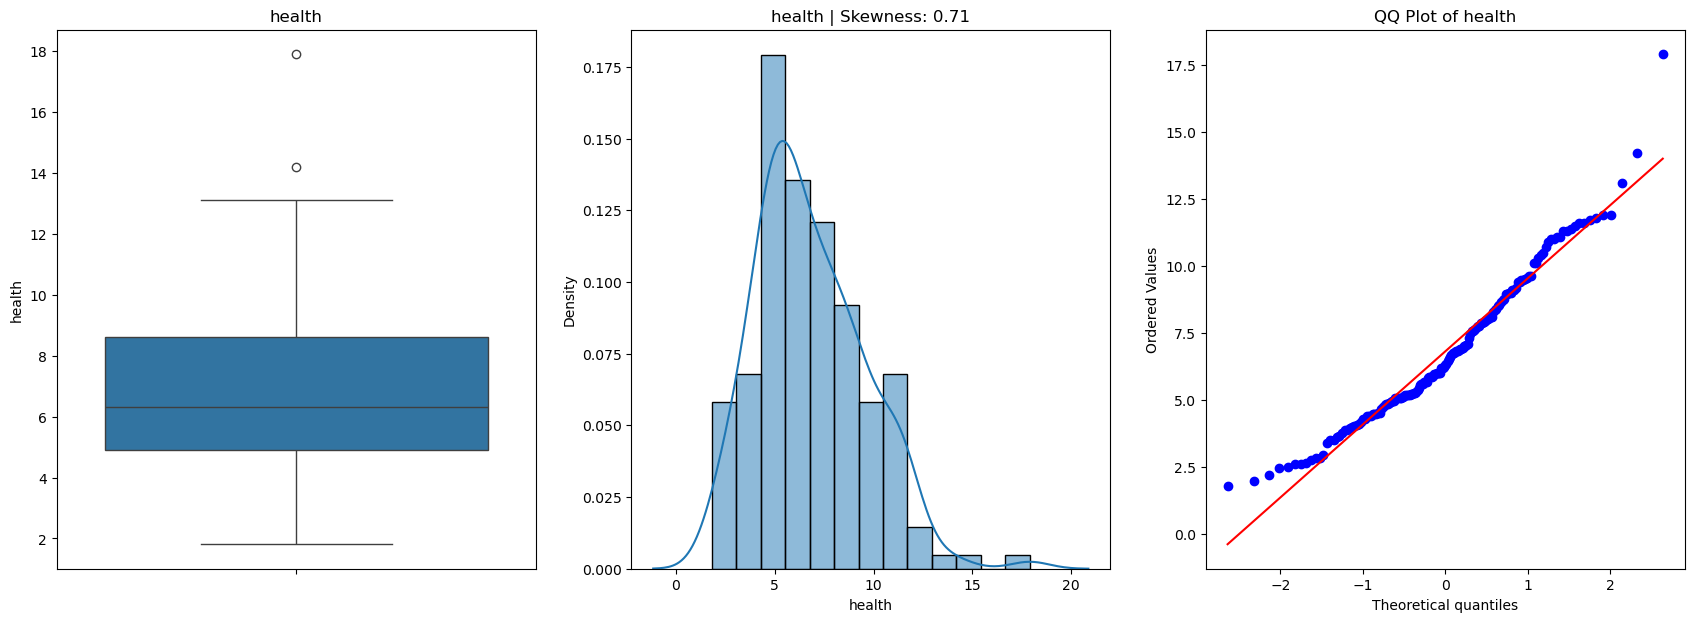

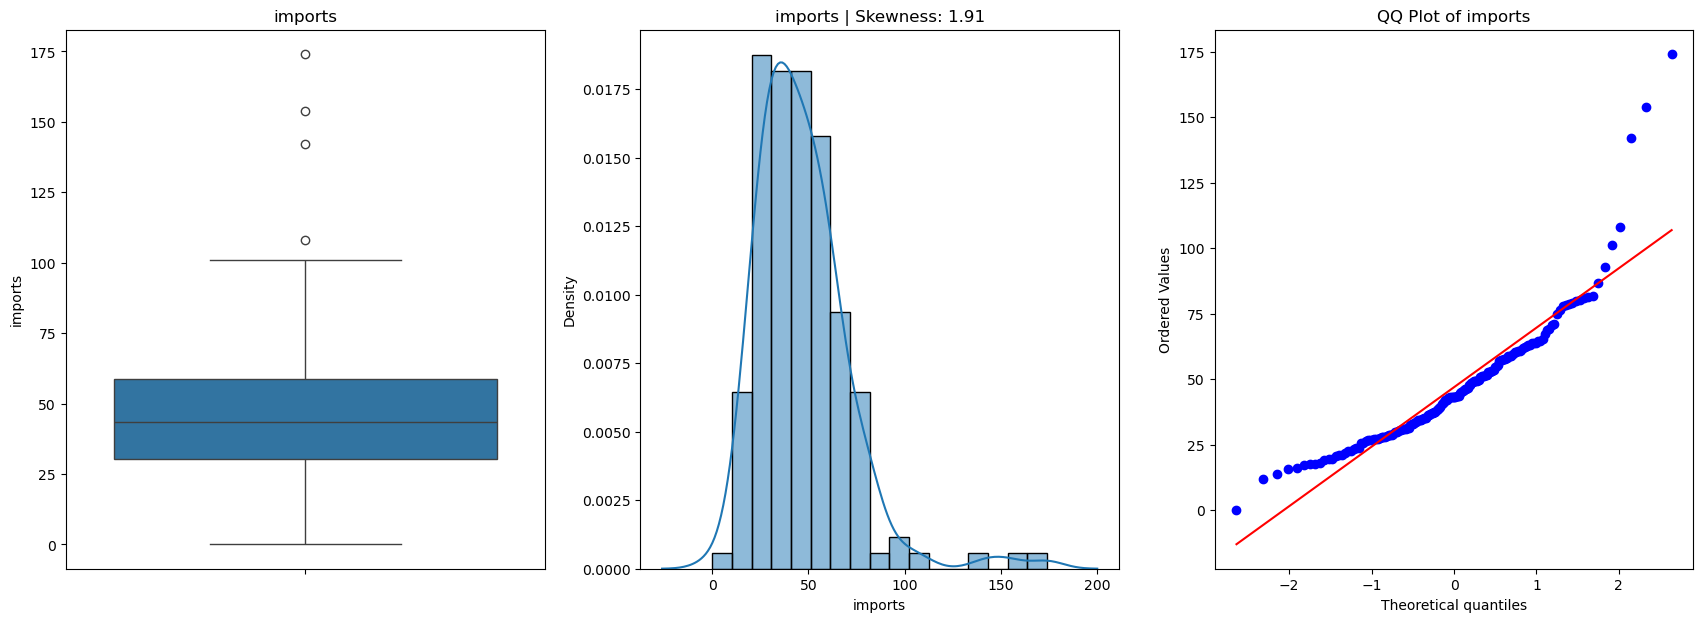

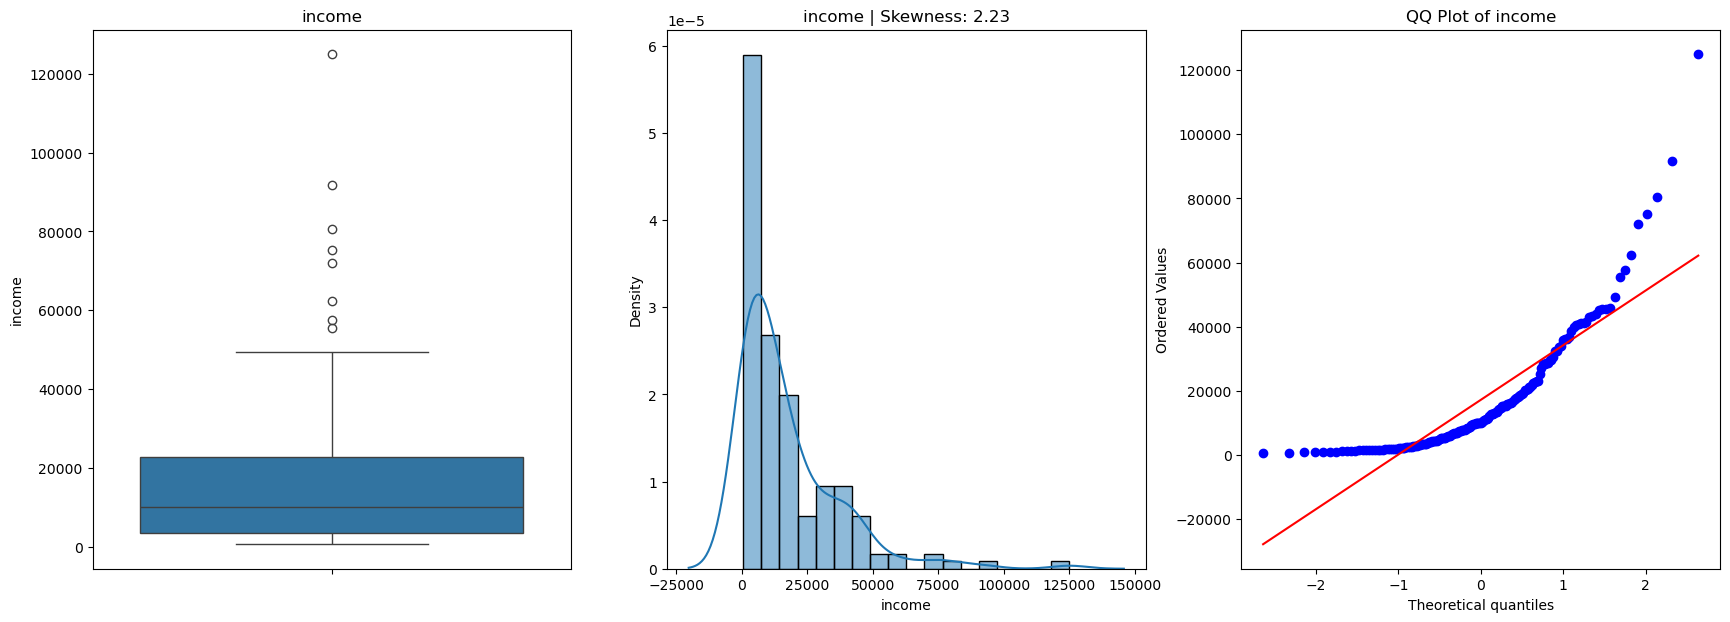

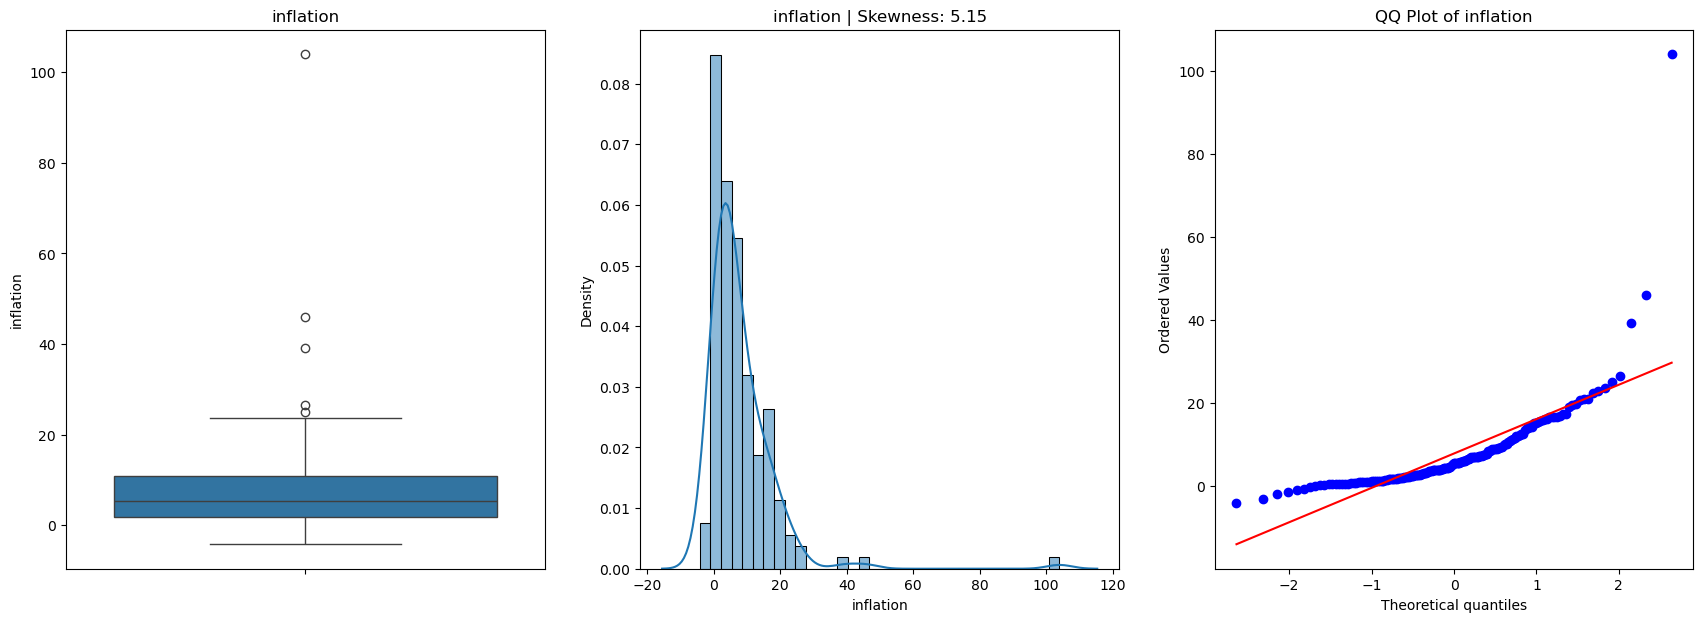

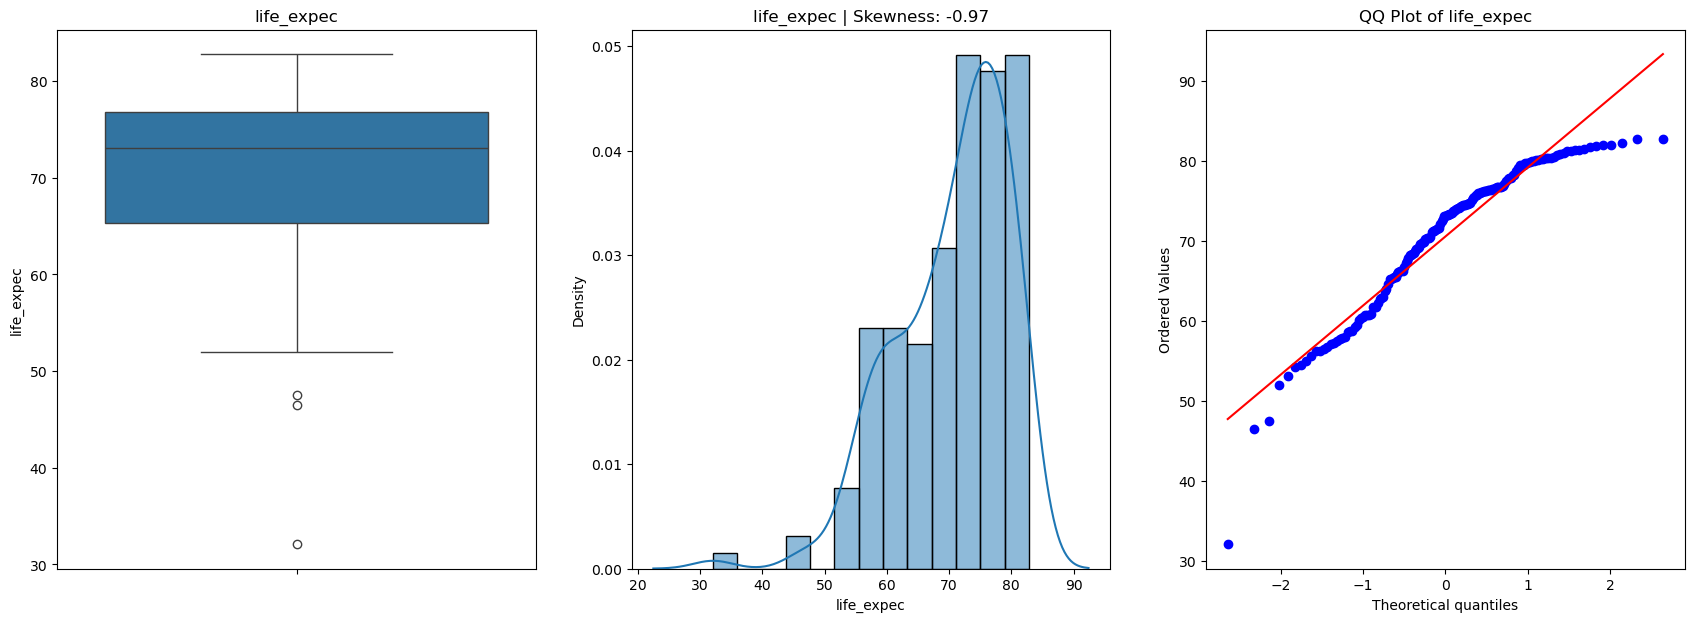

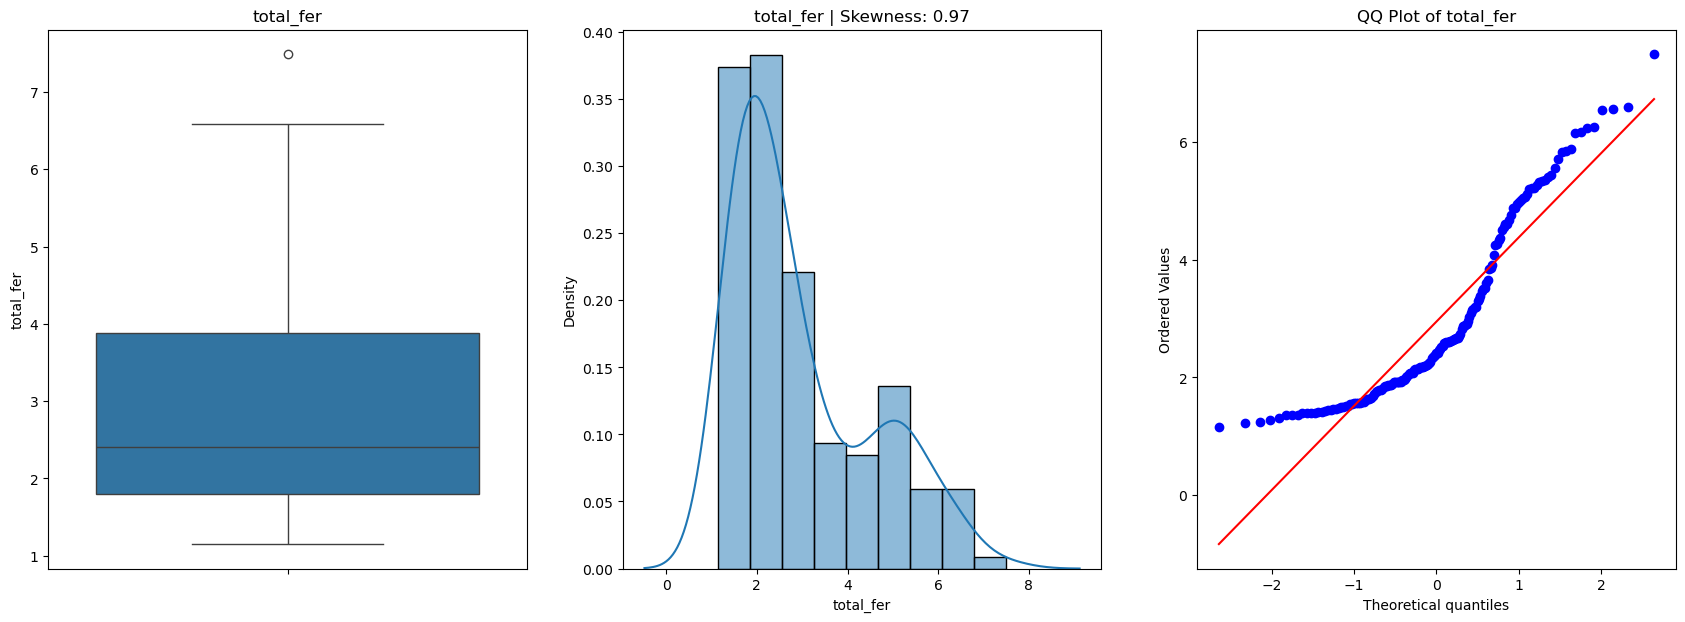

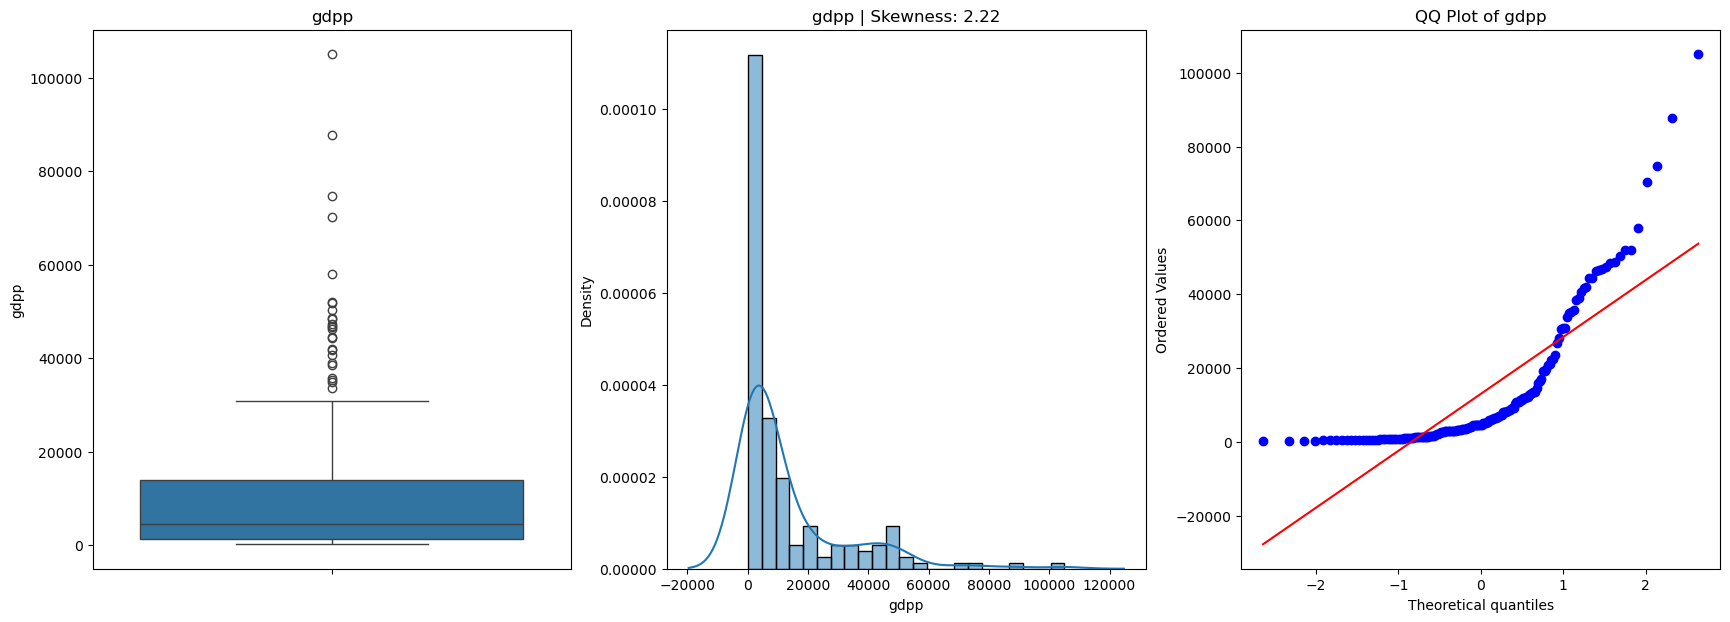

Columns with outliers: ['child_mort' 'exports' 'health' 'imports' 'income' 'inflation'
 'life_expec' 'total_fer' 'gdpp']


In [8]:
from scipy import stats
outlier_cols = []

for col in numeric_feature:
    n = df[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(df[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(df[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

In [9]:
X_cap = df.copy()
for col in outlier_cols:
       percentile25 = df[col].quantile(0.25)
       percentile75 = df[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       X_cap[col] = np.where(
         X_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  X_cap[col] < lower_limit,
                  lower_limit,
                  X_cap[col]
                  )
       )

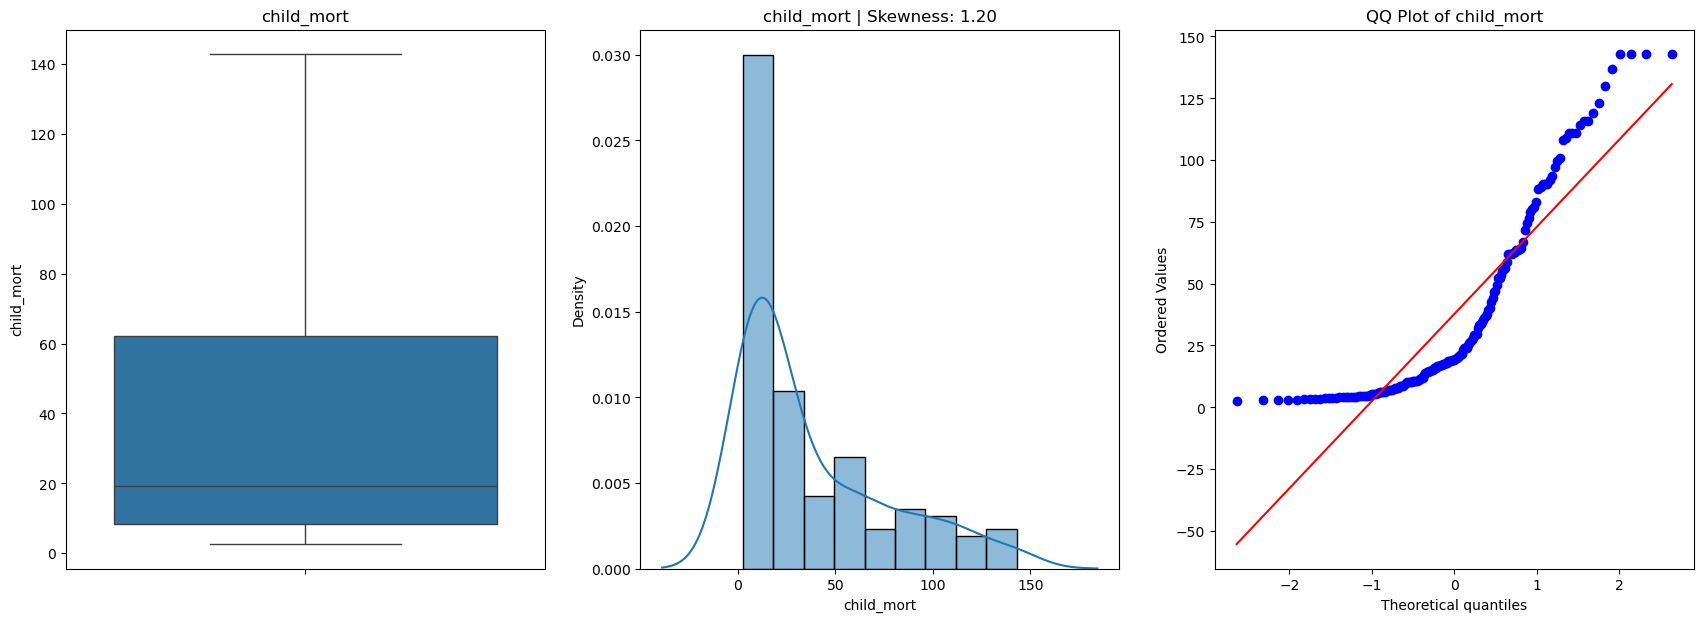

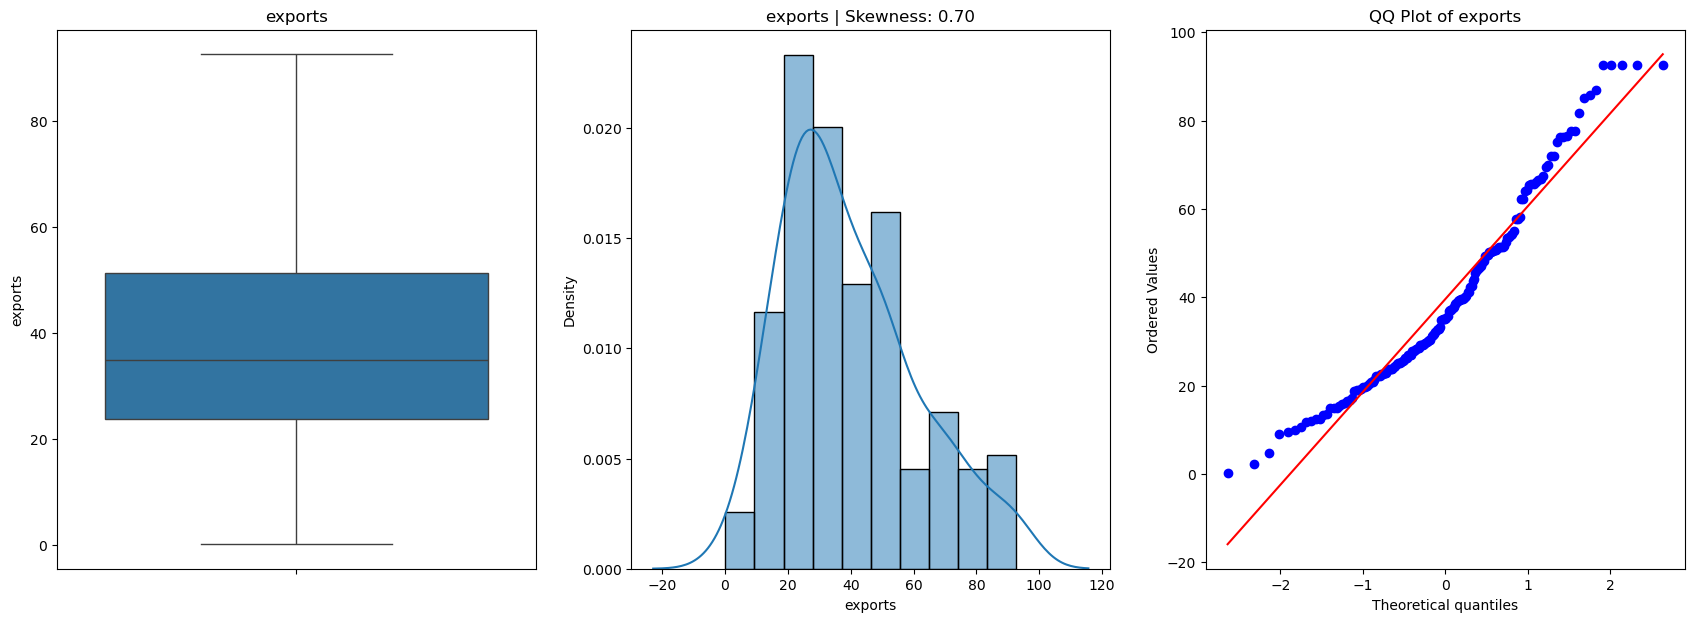

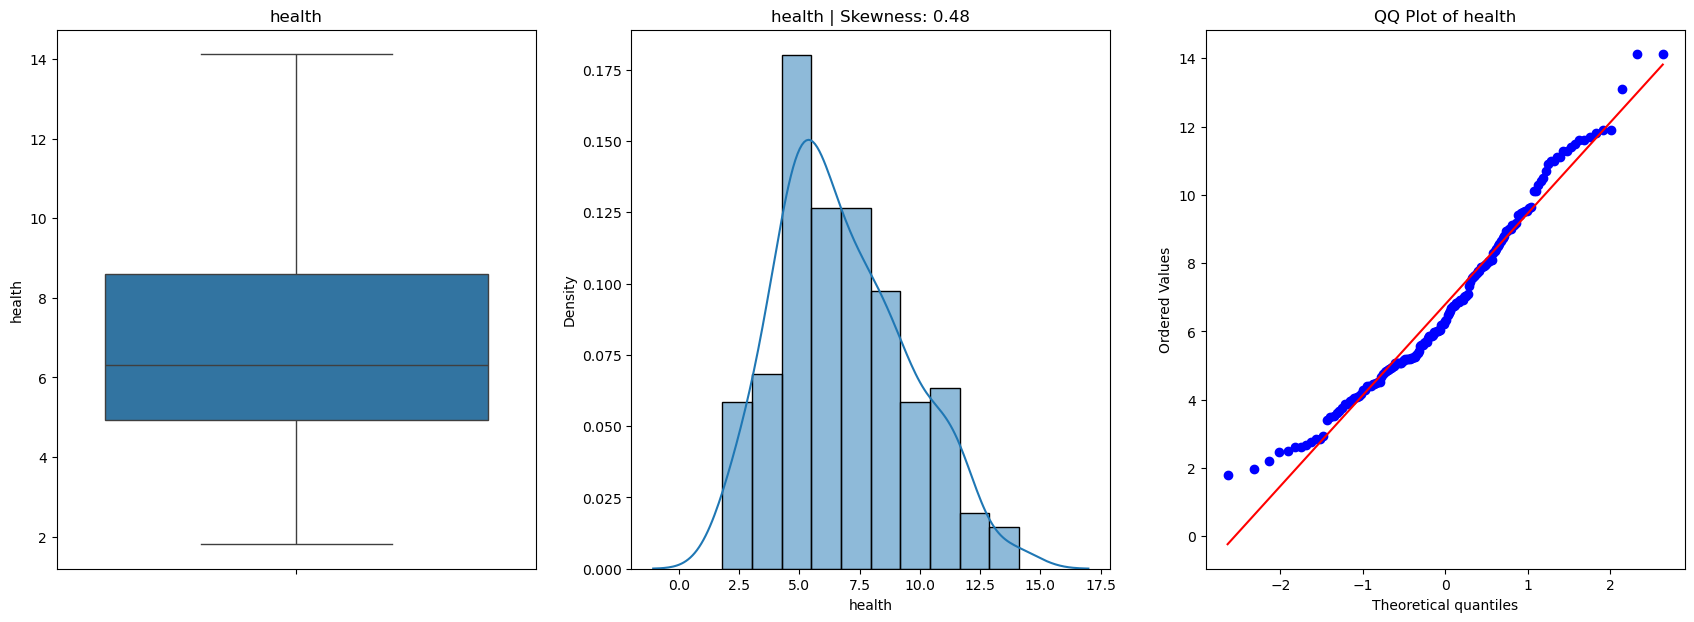

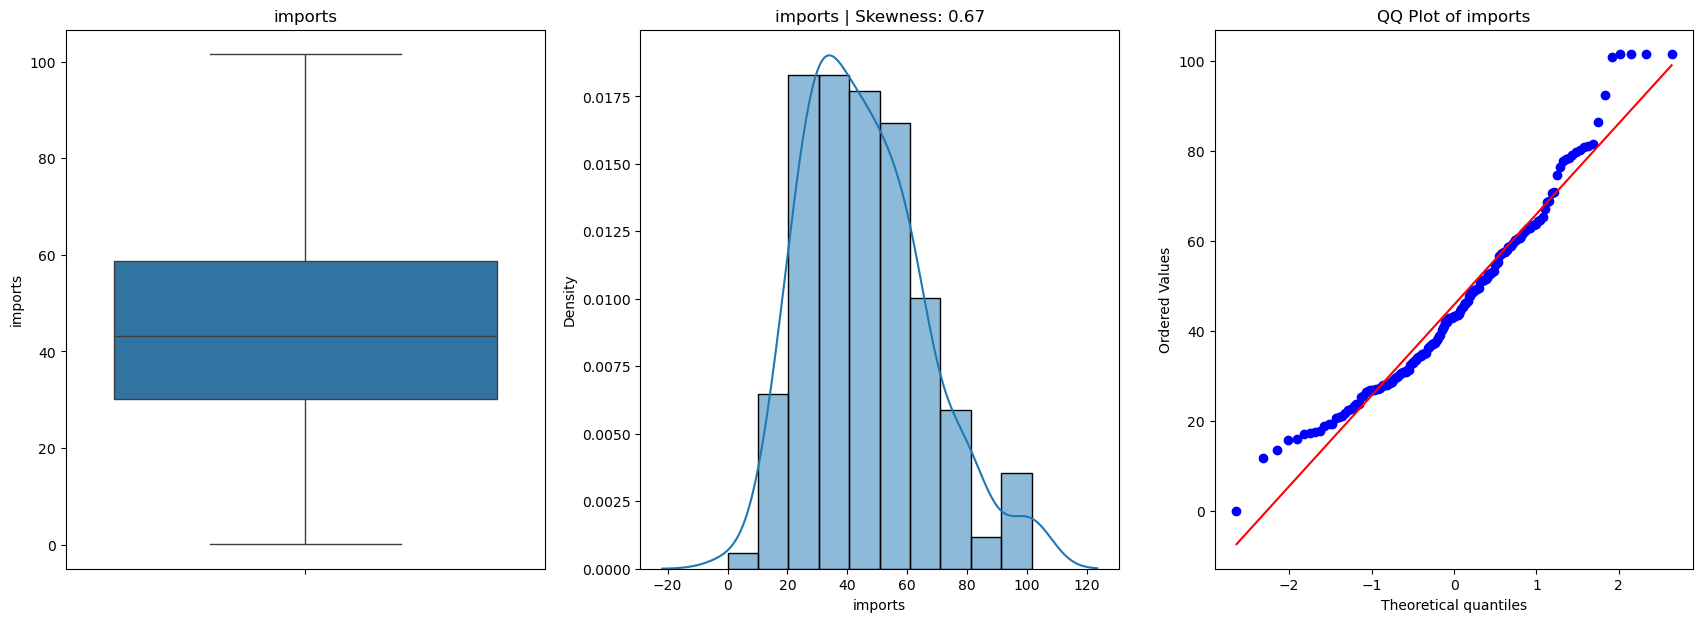

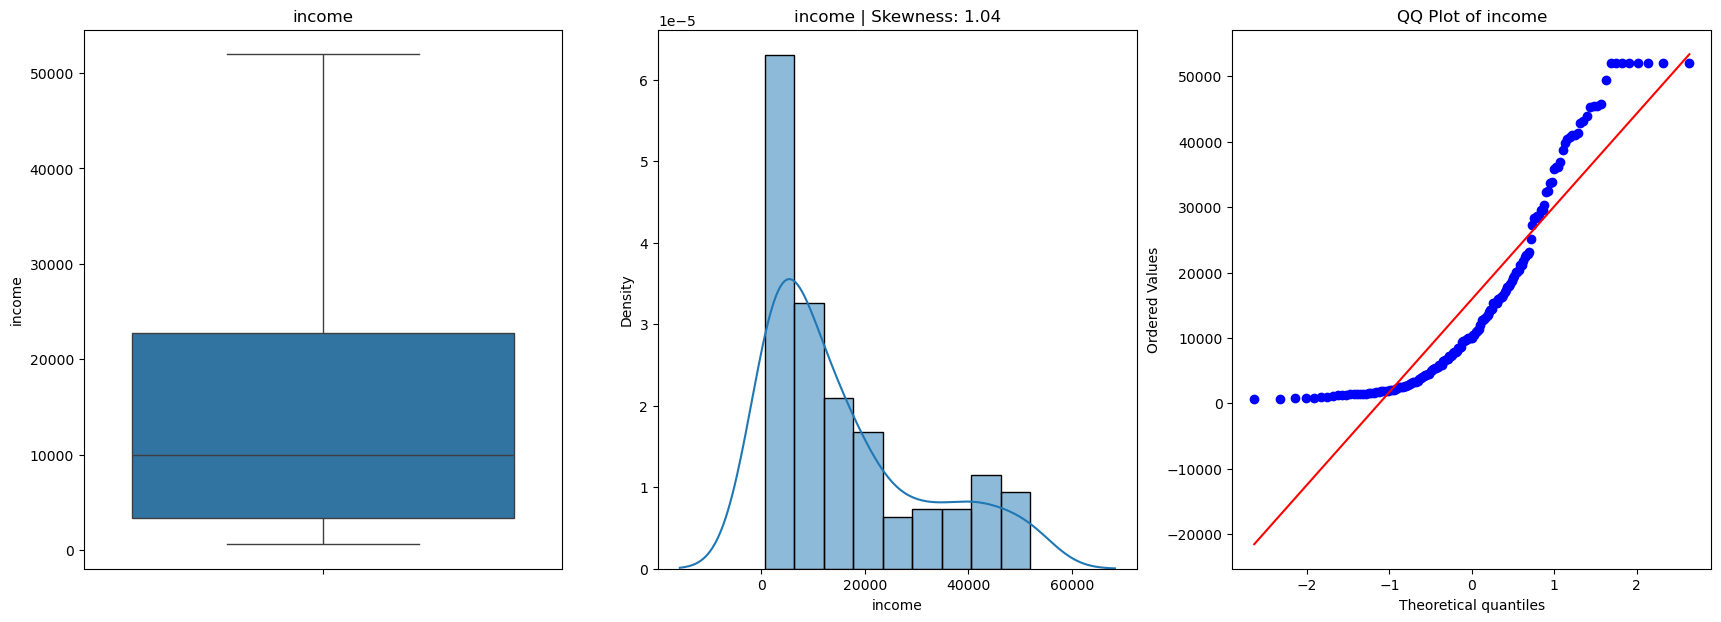

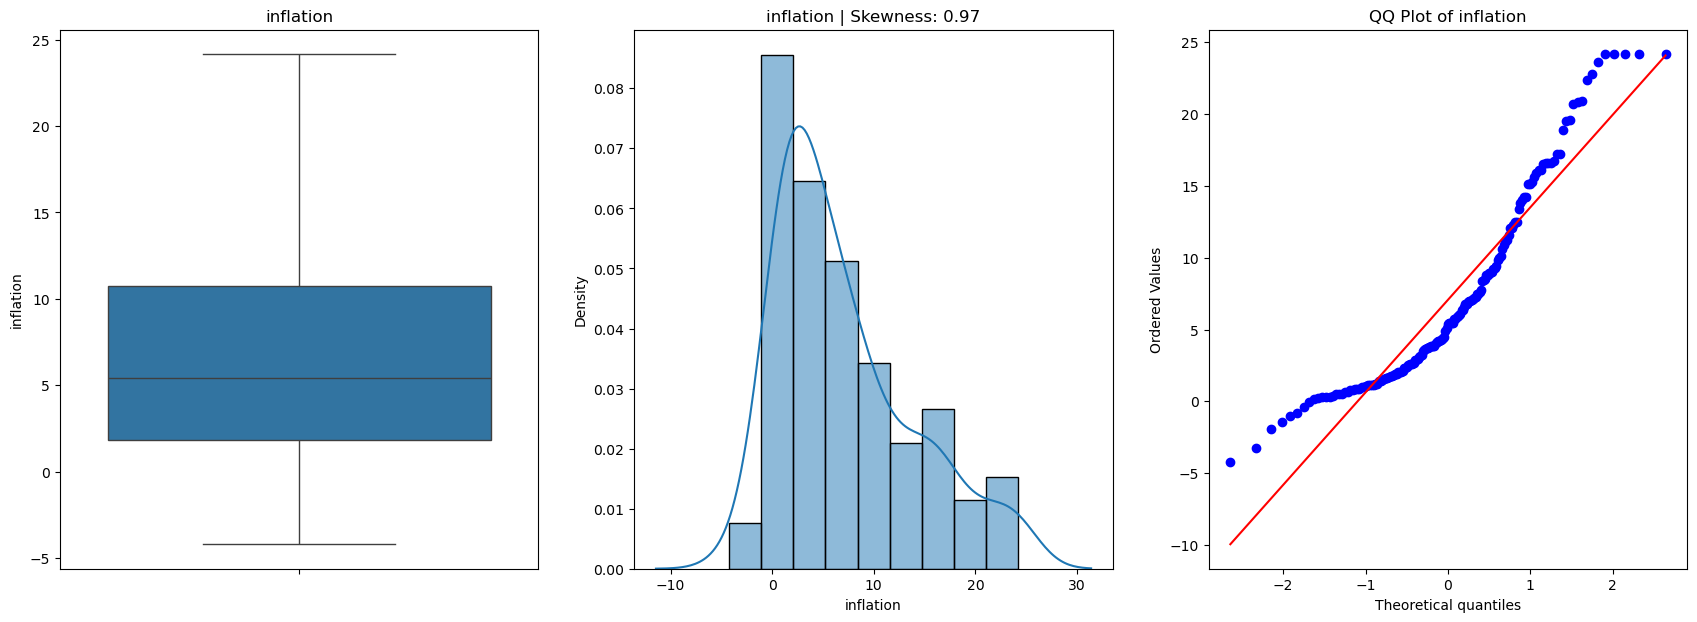

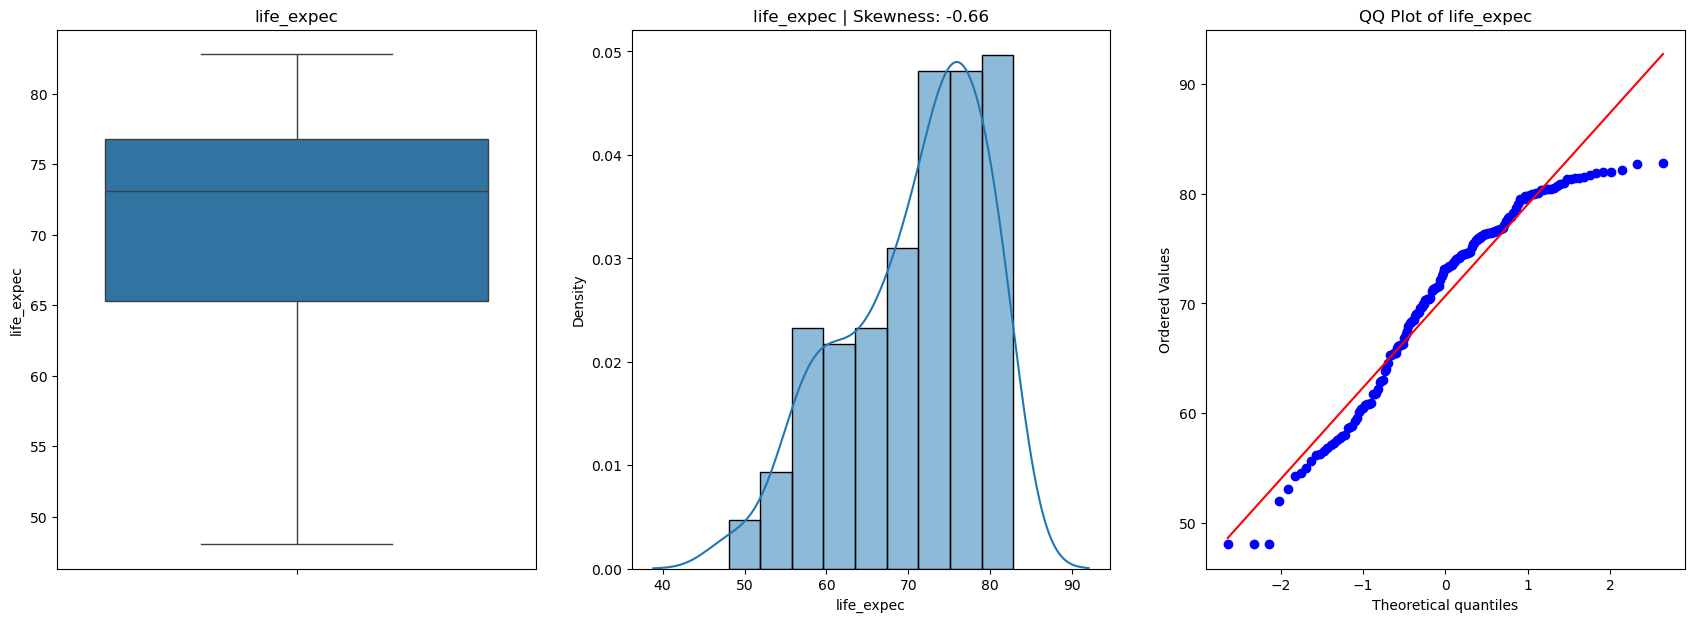

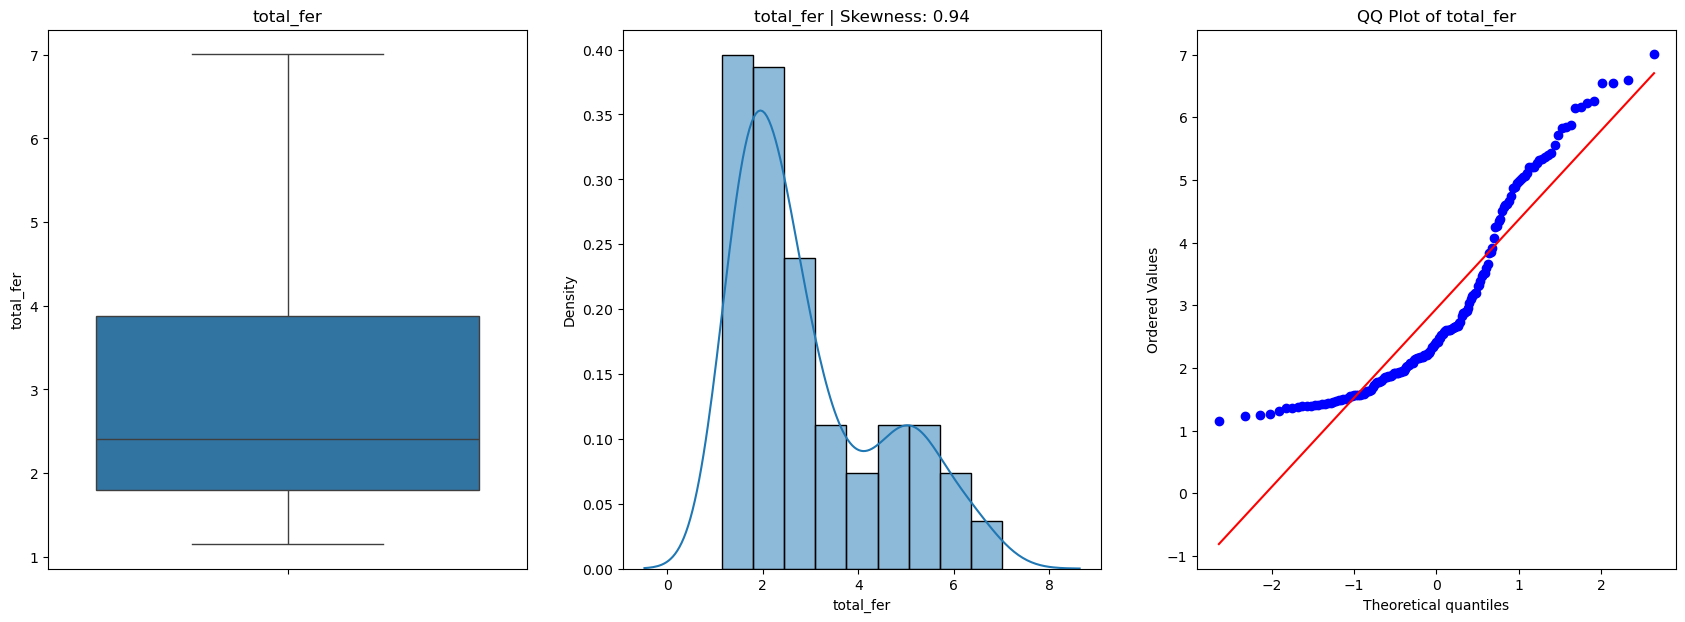

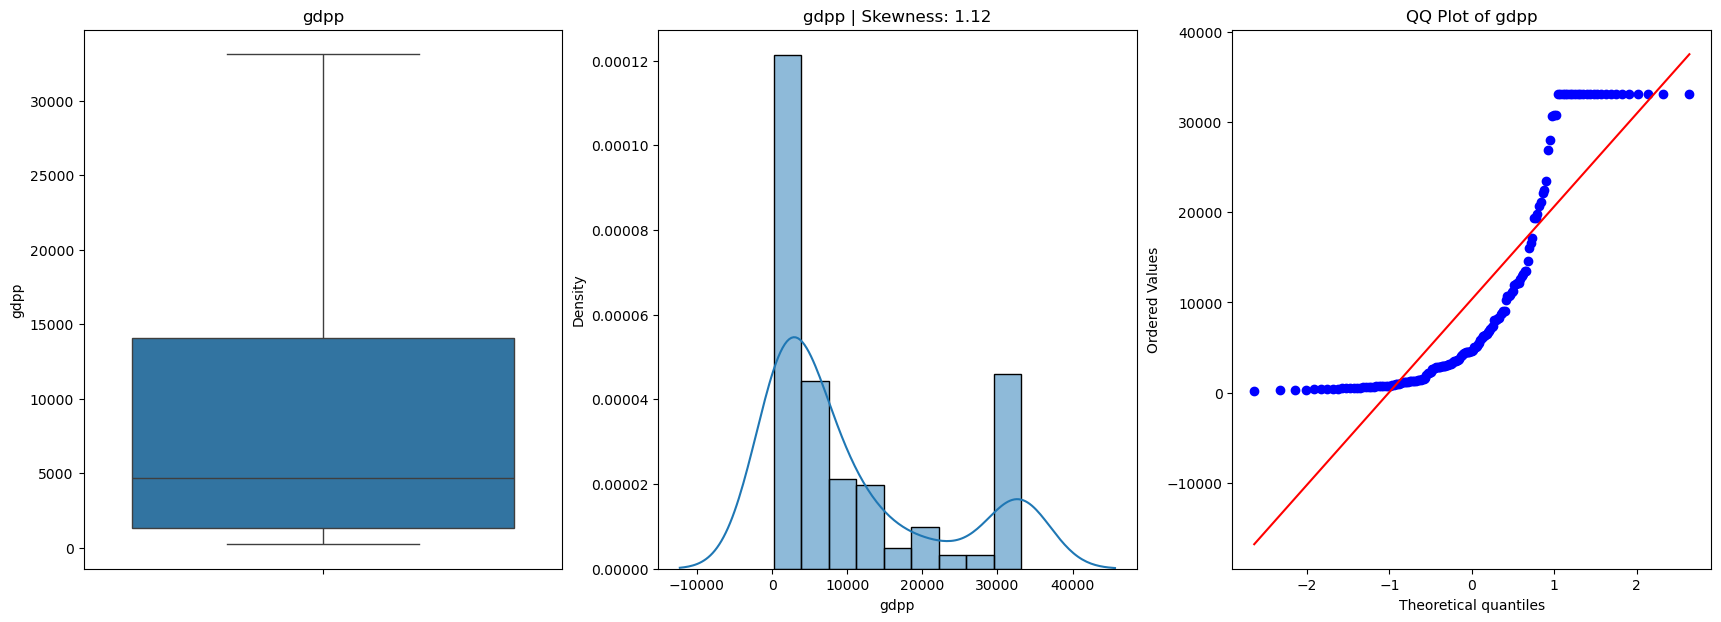

Columns with outliers: []


In [10]:
outlier_cols = []

for col in numeric_feature:
    n = X_cap[col].skew()
    # print(f"Column: {col} | Skewness: {n}")
    plt.figure(figsize=(21, 7))

    plt.subplot(131)
    sns.boxplot(X_cap[col])
    plt.title(col)

    

    plt.subplot(132)
    sns.histplot(X_cap[col], kde=True, stat="density", kde_kws=dict(cut=3))
    plt.title(f"{col} | Skewness: {n:.2f}")

    plt.subplot(133)
    stats.probplot(X_cap[col], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {col}")

    
    q1 = np.percentile(X_cap[col], 25)
    q3 = np.percentile(X_cap[col], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (X_cap[col] < lower_bound) | (X_cap[col] > upper_bound)

    if outliers.any():
        outlier_cols.append(col)

    

plt.show()

outlier_cols = np.array(outlier_cols)  # Convert list to NumPy array
print("Columns with outliers:", outlier_cols)

   # print(f"Column: {col} | Skewness: {n}")

plt.show()

Skewness of features:
 child_mort    1.437710
exports       2.423800
health        0.699391
imports       1.888120
income        2.211386
inflation     5.107640
life_expec   -0.962252
total_fer     0.958383
gdpp          2.198079
dtype: float64


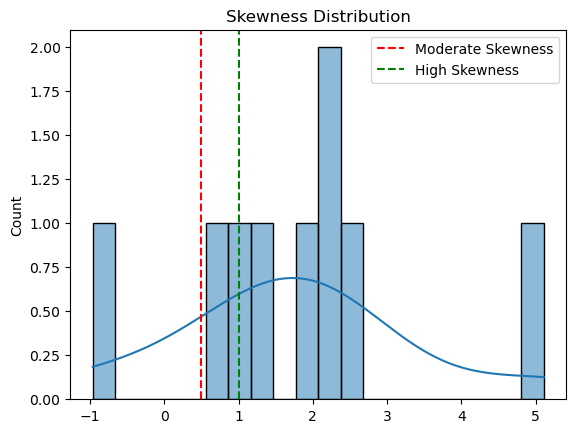

In [11]:
from scipy.stats import skew
skewness = df[numeric_feature].apply(skew)
print("Skewness of features:\n", skewness)

# Plot histogram of skewness
sns.histplot(skewness, kde=True, bins=20)
plt.axvline(x=0.5, color='r', linestyle='--', label='Moderate Skewness')
plt.axvline(x=1, color='g', linestyle='--', label='High Skewness')
plt.legend()
plt.title("Skewness Distribution")
plt.show()

In [12]:
# Apply Log Transformation for highly skewed features
df_transformed = df.copy()
for col in numeric_feature:
    if skewness[col] > 0.5:
        df_transformed[col] = np.log1p(df[col])  # log1p handles zero values

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
X = df.drop(columns=["country"])

In [14]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize Min-Max Scaler
# scaler = MinMaxScaler()

# # Fit and transform the data (excluding the 'country' column)
# X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans
# Apply K-Means clustering
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [16]:
# Assign cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

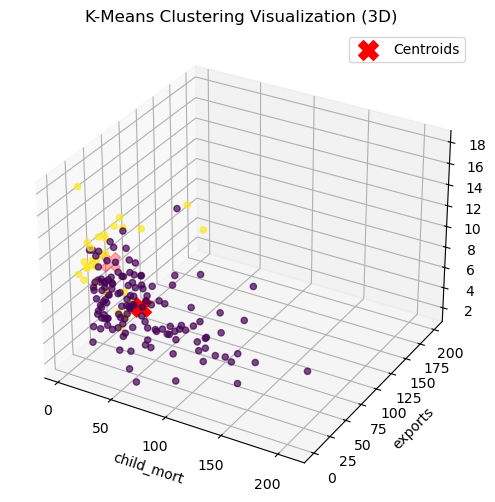

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for clustered points
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c=df['Cluster'], cmap='viridis', alpha=0.7)

# Scatter plot for centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           s=200, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_title('K-Means Clustering Visualization (3D)')
ax.set_xlabel(df.columns[1])
ax.set_ylabel(df.columns[2])
ax.set_zlabel(df.columns[3])
ax.legend()
plt.show()

In [18]:
# Display first few rows with assigned clusters
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

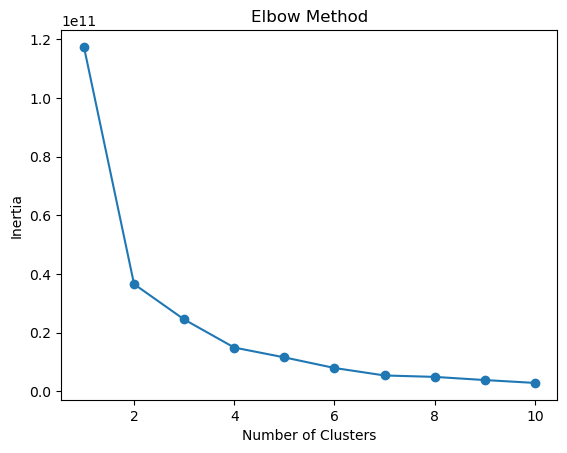

In [19]:
inertia = []
K_range = range(1, 11)  # Checking for 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [20]:
# Display cluster-wise analysis (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_summary = df[numeric_columns].groupby('Cluster').mean()

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         child_mort    exports    health    imports        income  inflation  \
Cluster                                                                        
0         46.015556  37.586659  6.420296  46.992340   9602.688889   8.713348   
1          5.593750  55.968750  8.483750  46.459375  48962.500000   3.852000   

         life_expec  total_fer          gdpp  
Cluster                                       
0         68.294074   3.198815   5348.992593  
1         80.096875   1.889687  45090.625000  


In [21]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [22]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(X, df['Cluster'])

print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.7256
